# **Linear Regression model building**

**Done By:** *Mohamad Namroud*

**Dataset:** https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/data

## **About the dataset:** 

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Goal:

To build a model doing better than **.91** Score which is done by OnurCaan 

### **Metadata**  

- **Car_ID**: Unique ID of each observation (Integer)  
- **Symboling**: Assigned insurance risk rating; +3 indicates high risk, -3 indicates low risk (Categorical)  
- **CarCompany**: Name of the car manufacturer (Categorical)  
- **FuelType**: Type of fuel used (Gas or Diesel) (Categorical)  
- **Aspiration**: Type of aspiration used in the car (Standard or Turbocharged) (Categorical)  
- **DoorNumber**: Number of doors in the car (Categorical)  
- **CarBody**: Body type of the car (Sedan, Coupe, Hatchback, etc.) (Categorical)  
- **DriveWheel**: Type of drive wheel (Front-Wheel, Rear-Wheel, All-Wheel) (Categorical)  
- **EngineLocation**: Location of the car's engine (Front or Rear) (Categorical)  
- **Wheelbase**: Distance between front and rear wheels (Numeric)  
- **CarLength**: Overall length of the car (Numeric)  
- **CarWidth**: Width of the car (Numeric)  
- **CarHeight**: Height of the car (Numeric)  
- **CurbWeight**: Weight of the car without passengers or cargo (Numeric)  
- **EngineType**: Type of engine (DOHC, SOHC, Rotary, etc.) (Categorical)  
- **CylinderNumber**: Number of cylinders in the engine (Categorical)  
- **EngineSize**: Size of the engine in cubic centimeters (Numeric)  
- **FuelSystem**: Type of fuel system (MPFI, Carburetor, etc.) (Categorical)  
- **BoreRatio**: Ratio of the bore (cylinder diameter) to stroke (Numeric)  
- **Stroke**: Stroke length of the engine (Numeric)  
- **CompressionRatio**: Engine's compression ratio (Numeric)  
- **Horsepower**: Maximum horsepower output of the car (Numeric)  
- **PeakRPM**: Engine's peak revolutions per minute (Numeric)  
- **CityMPG**: Miles per gallon in city driving conditions (Numeric)  
- **HighwayMPG**: Miles per gallon on highways (Numeric)  
- **Price**: Price of the car (Dependent Variable) (Numeric)  



# Download the data

In [1]:
# Code to download the data if not downloaded
import kagglehub
from pathlib import Path
import shutil

data_dir = Path("data")
data_dir.mkdir(parents=True, exist_ok=True)

download_path = kagglehub.dataset_download("erolmasimov/price-prediction-multiple-linear-regression")

for file in Path(download_path).iterdir():
    shutil.move(str(file), str(data_dir))

print("Dataset saved in:", data_dir.resolve())

Dataset saved in: C:\Users\Cursist\Desktop\python\My cases\data_science_cases\cases\Linear_Price_dataset\data


# Loading exploring, and cleaning the data

In [2]:
import pandas as pd
df = pd.read_csv('data/scrap price.csv')
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
# Checking the categorical columns
for col in df.select_dtypes(exclude=["number"]).columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 50)

Value counts for column: name
name
peugeot 504                 6
toyota corolla              6
toyota corona               6
subaru dl                   4
mitsubishi outlander        3
                           ..
volkswagen super beetle     1
volkswagen rabbit custom    1
volvo 245                   1
volvo diesel                1
volvo 246                   1
Name: count, Length: 147, dtype: int64
--------------------------------------------------
Value counts for column: fueltypes
fueltypes
gas       185
diesel     20
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: doornumbers
doornumbers
four    115
two      90
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: carbody
carbody
sedan          96
hatchback      70
wagon          25


In [6]:
# Missing values
df.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Code to drop the missing values
df = df.dropna(axis=0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop_duplicates()

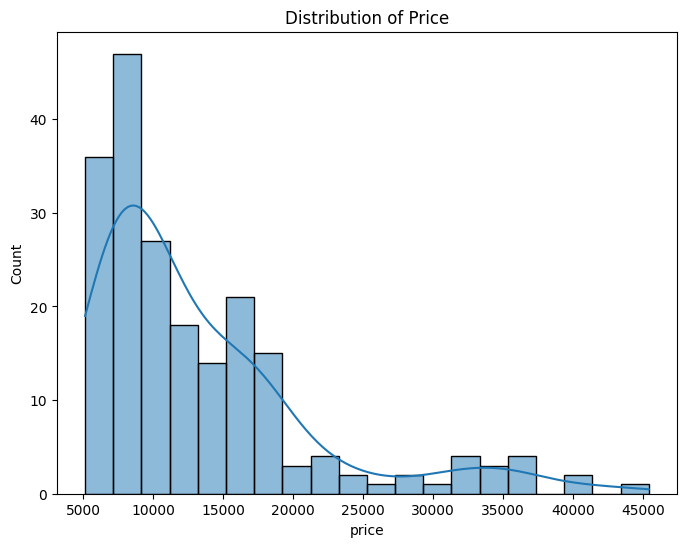

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

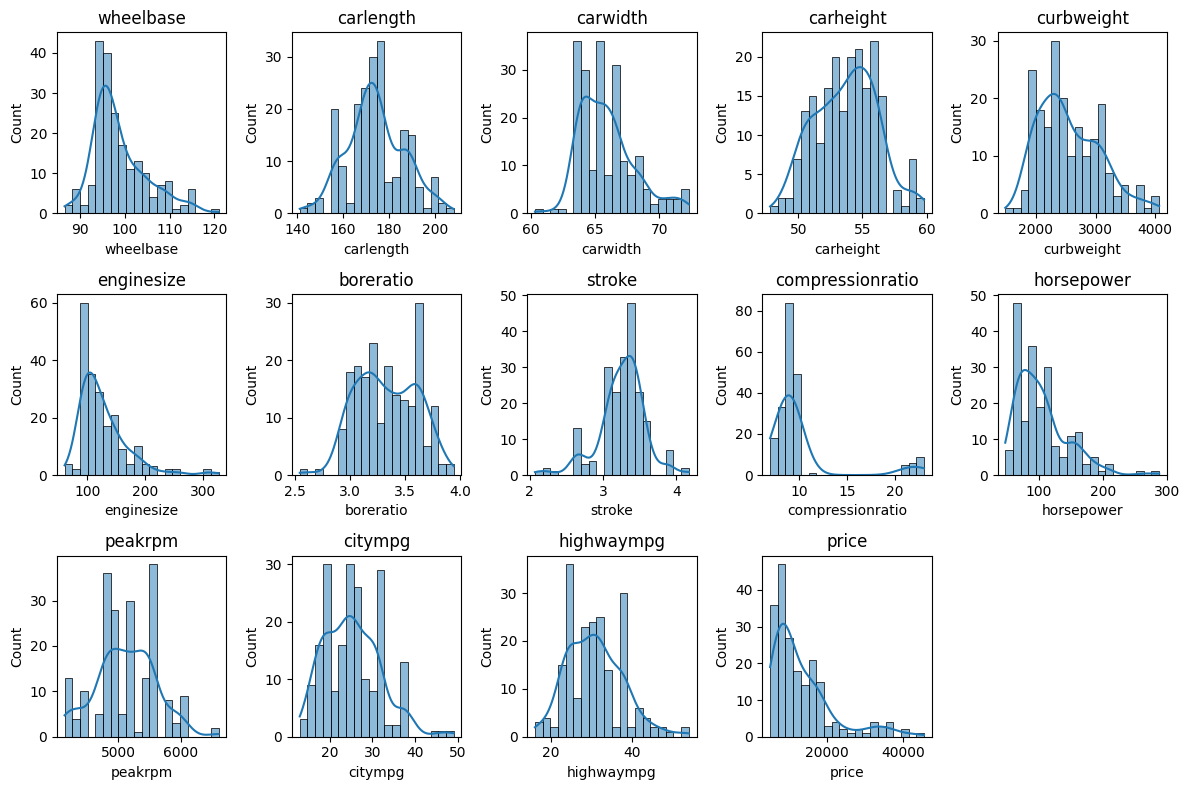

In [11]:
numeric_features = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", 
                    "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", 
                    "citympg", "highwaympg", "price"]

plt.figure(figsize=(12, 8))
for feature in numeric_features:
    plt.subplot(3, 5, numeric_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

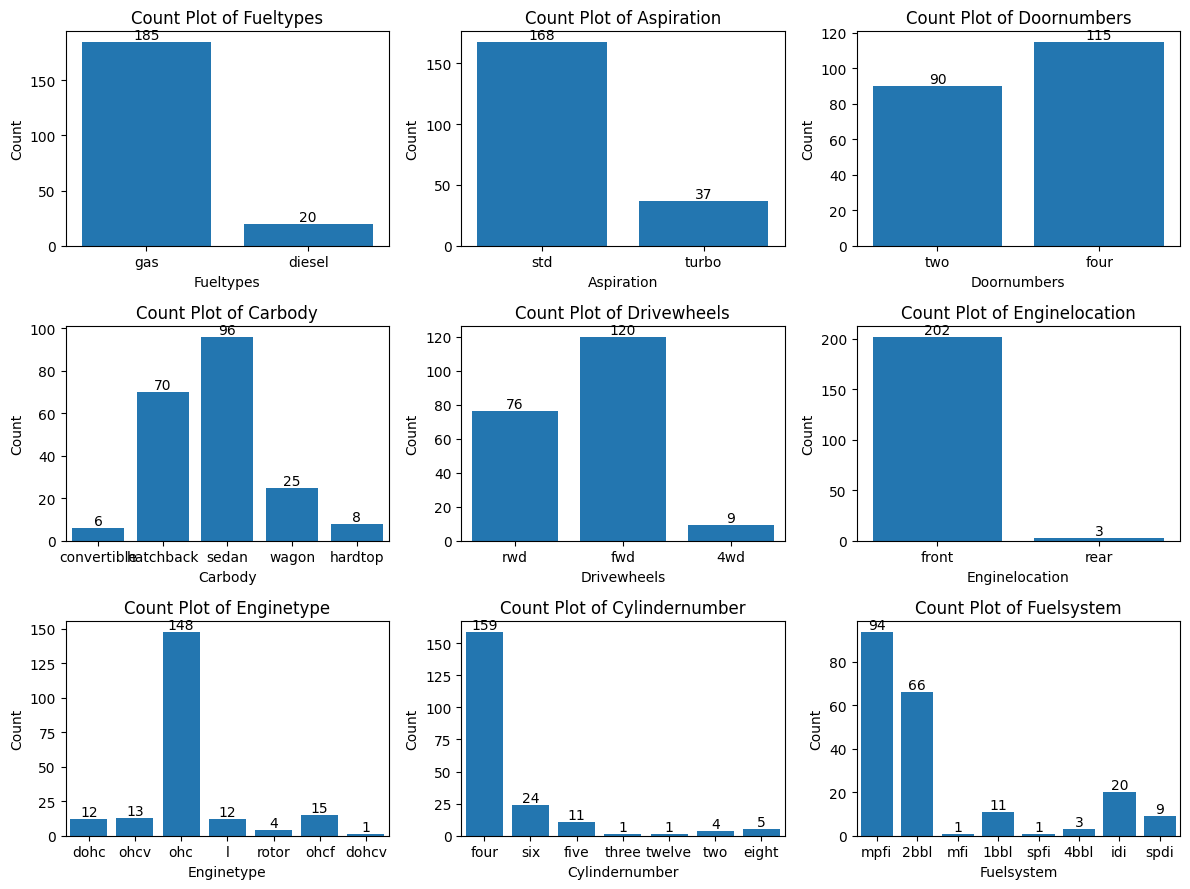

In [12]:
categorical_features = [ "fueltypes", "aspiration", 
                        "doornumbers", "carbody", "drivewheels", "enginelocation", 
                        "enginetype", "cylindernumber", "fuelsystem"]
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_features):
    sns.countplot(x=df[column], data=df, ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

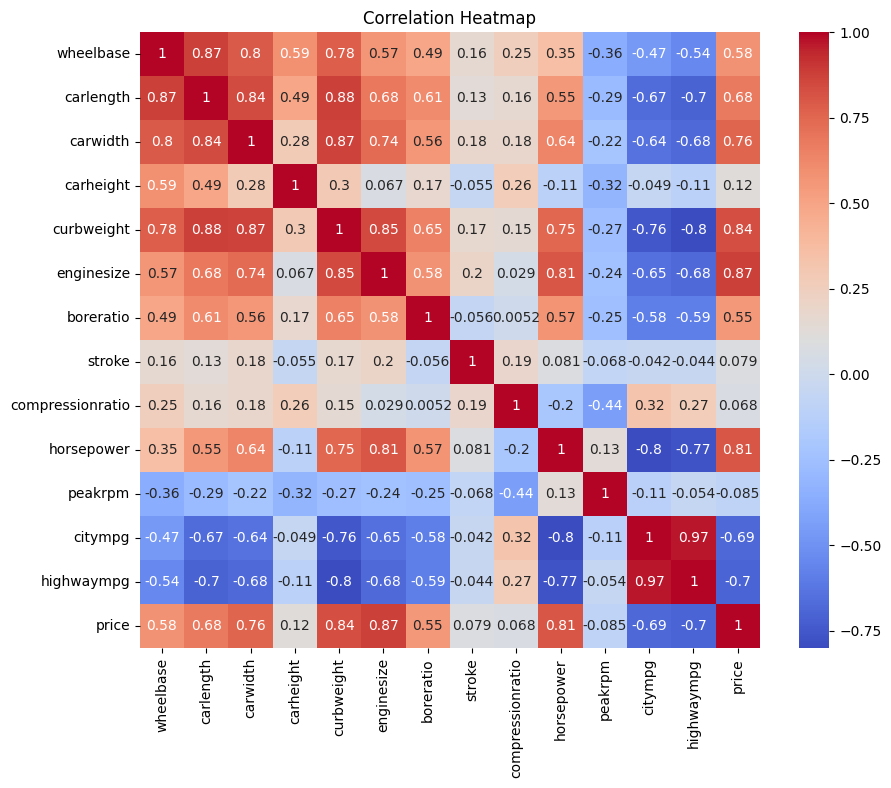

In [13]:
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

In [14]:
# Removing columns that don't affect the model
df.drop(columns=['ID', 'name'], inplace=True)

In [15]:
# Dropping highly correlated features and creating new ones

df['avg_mpg'] = (df['citympg'] + df['highwaympg']) / 2
df['power_to_weight'] = df['horsepower'] / df['curbweight']
df['size_index'] = df['curbweight'] * df['enginesize']

# Removing redundant features
df.drop(columns=['citympg', 'highwaympg'], inplace=True)


# Outliers Removing

In [16]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Outlier removal using IQR method
for feature in numerical_features:
    # Calculate IQR for each numerical feature
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Check for outliers and cap them
    outliers_above = df[feature] > upper
    outliers_below = df[feature] < lower
    
    if outliers_above.any():
        df.loc[outliers_above, feature] = upper
        print(f"Outliers in {feature} above {upper} have been capped.")
    
    if outliers_below.any():
        df.loc[outliers_below, feature] = lower
        print(f"Outliers in {feature} below {lower} have been capped.")

print("Outlier removal completed.")

Outliers in wheelbase above 114.25000000000001 have been capped.
Outliers in carlength below 141.10000000000002 have been capped.
Outliers in carwidth above 71.10000000000002 have been capped.
Outliers in enginesize above 207.0 have been capped.
Outliers in stroke above 3.8600000000000003 have been capped.
Outliers in stroke below 2.6599999999999993 have been capped.
Outliers in compressionratio above 10.600000000000001 have been capped.
Outliers in compressionratio below 7.399999999999999 have been capped.
Outliers in horsepower above 185.0 have been capped.
Outliers in peakrpm above 6550.0 have been capped.
Outliers in price above 29575.5 have been capped.
Outliers in avg_mpg above 46.25 have been capped.
Outliers in power_to_weight above 0.059939728266421494 have been capped.
Outliers in size_index above 727764.0 have been capped.
Outlier removal completed.


# The Model

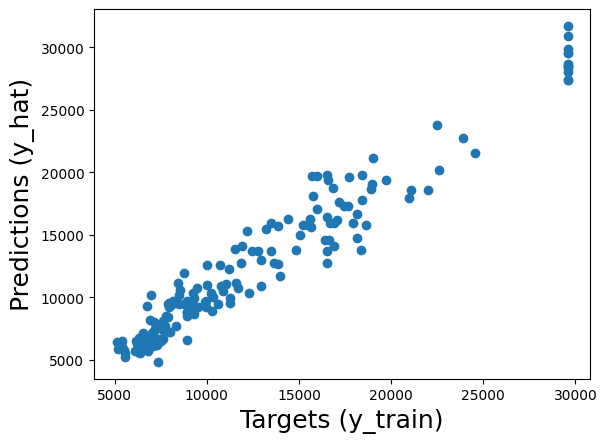

Train R^2 score:  0.9435494181677766


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define X (features) and y (target variable)
y = df['price']
X = df.drop(columns=['price'])

# Select numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define transformers for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply transformations to the appropriate features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(x_train, y_train)

# Make predictions
y_hat = pipeline.predict(x_train)

# Plotting
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

# Score the model
print("Train R^2 score: ", pipeline.score(x_train, y_train))


# Goal Achieved